In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

**Loading and Preprocessing Data**

In [ ]:
# Load data
data = pd.read_csv('/content/gdrive/MyDrive/Dataset/winequality-red.csv')

# Preprocessing (Standardizing the features)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


**Choosing the Number of Components**

Text(0.5, 0, 'n_components')

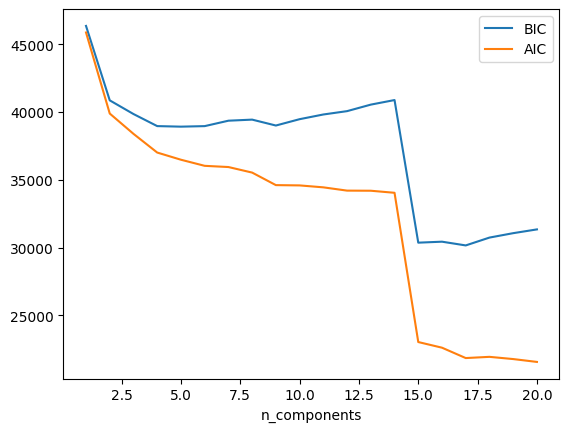

In [ ]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data_scaled) for n in n_components]

plt.plot(n_components, [m.bic(data_scaled) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data_scaled) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')


**Training the GMM Model**

In [ ]:
# Assuming optimal components found was 5
gmm = GaussianMixture(n_components=5, random_state=0)
gmm.fit(data_scaled)


GaussianMixture(n_components=5, random_state=0)

**Assigning Clusters to Data Points**

In [ ]:
labels = gmm.predict(data_scaled)
data['Cluster'] = labels


**Visualizing the Results**

Plotting the Clusters

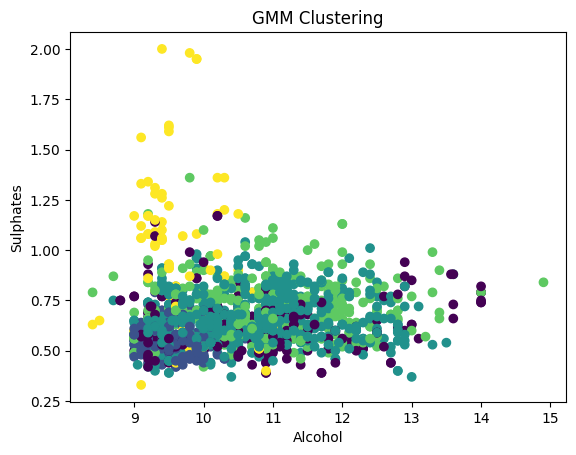

In [ ]:
plt.scatter(data['alcohol'], data['sulphates'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Alcohol')
plt.ylabel('Sulphates')
plt.title('GMM Clustering')
plt.show()


Displaying Model Probabilities

In [ ]:
probs = gmm.predict_proba(data_scaled)
print(probs[:5])  # Displaying probabilities of first 5 points


[[1.25541930e-04 1.66065123e-01 8.33431756e-01 8.23623576e-11
  3.77578289e-04]
 [3.26677921e-02 9.64459692e-01 5.20347840e-04 1.67107420e-12
  2.35216797e-03]
 [1.35995285e-03 9.89329964e-01 4.18553015e-03 8.16066384e-11
  5.12455263e-03]
 [2.53399899e-06 3.72622686e-02 2.43462478e-01 7.17039624e-01
  2.23309571e-03]
 [1.25541930e-04 1.66065123e-01 8.33431756e-01 8.23623576e-11
  3.77578289e-04]]
